In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/news_dataset.csv')

In [ ]:
df.head()

,Unnamed: 0,URL,title,text,keywords,Label
0,0,https://timesofindia.indiatimes.com/tv/news/hi...,Did you know Payal Ghosh who accused Anurag Ka...,Payal has accused filmmaker Anurag Kashyap of ...,"saath, know, whatsapp, work, saathiya, miscond...",REAL
1,1,https://www.boomlive.in/fake-news/fake-news/is...,Is This A Video Of Vajpayee's Niece Slamming T...,A four-minute-long video of a woman criticisin...,"alvi, video, atiya, woman, caa, vajpayees, pak...",FAKE
2,2,https://www.boomlive.in/fake-news/fake-news/no...,Not That Republic: Twitter Users Fight With Fa...,"Republic Poll, a fake Twitter account imitatin...","tv, twitter, fake, running, account, view, par...",FAKE
3,3,https://timesofindia.indiatimes.com/city/delhi...,Glass into sand: Delhi teen finds place on UN ...,"Delhi teen finds place on UN green list, turns...","united, work, list, place, teen, finds, bottle...",REAL
4,4,https://timesofindia.indiatimes.com/india/heat...,Farm bill 2020: Heated debate on farm bills in...,Delhi: A high-level meeting underway at reside...,"narendra, heckle, rajya, presiding, bills, mod...",REAL


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786 entries, 0 to 3785
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3786 non-null   int64 
 1   URL         3786 non-null   object
 2   title       3778 non-null   object
 3   text        3778 non-null   object
 4   keywords    3778 non-null   object
 5   Label       3786 non-null   object
dtypes: int64(1), object(5)
memory usage: 177.6+ KB


In [ ]:
print(df.text.sample().iloc[0])

Claim

"Important message from RBI - A very useful tip while withdrawing funds from an ATM. Press 'cancel' button twice before inserting the card. If anyone has set up the key pad to steal your PIN code. Please make it a habit and part of every transaction that RBI you make. Share for Your Circle People. "

Fact

The above message is fake and has not been issued by the Reserve Bank of India (RBI). BOOM had previously fact-checked the same message in October 2018. A source within the RBI at that time told BOOM that the message was fake and confirmed that it did not come from the central bank.


In [ ]:
df.Label.value_counts()

REAL                          1893
FAKE                          1877
['Krutika Kale']                 3
['A Staff Writer']               3
['Boom Fact Check Team']         2
['Swasti Chatterjee']            2
['Anmol Alphonso']               1
['Arya Dinesh']                  1
['Karen Rebelo']                 1
['Nivedita Niranjankumar']       1
['Sumit Usha']                   1
[]                               1
Name: Label, dtype: int64

In [ ]:
df = df[(df.Label=='REAL') | (df.Label =='FAKE')]

In [ ]:
df.Label.value_counts()

REAL    1893
FAKE    1877
Name: Label, dtype: int64

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def clean_text(text):
  text = text.lower()
  text = re.sub(r'http\S+|www\S+', '', text)
  text = re.sub(r'@[A-Za-z0-9]+', '', text)
  text = word_tokenize(text)
  text = [t for t in text if t not in stop_words]
  text = [t for t in text if t.isalpha()]
  text = [lemmatizer.lemmatize(t, pos='v') for t in text]
  text = ' '.join(text)
  return text

In [ ]:
clean_text(df.text[0])

'payal accuse filmmaker anurag kashyap behave inappropriately video go viral maintain stance speak etimes say want speak long time today finally think must get head tweet incident sometime ago metoo movement happen many people tell delete tweet else would stop get work manager advise remove tweet comply post anurag block whatsapp'

In [ ]:
df.text = df.text.apply(lambda x: clean_text(x))

In [ ]:
df.text = df.text.apply(lambda x: np.str_(x))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.text, df.Label, test_size = 0.3, random_state =53)

In [ ]:
tfidf = TfidfVectorizer()
tfidf_train = tfidf.fit_transform(X_train)
tfidf_test = tfidf.transform(X_test)

In [ ]:
tfidf.get_feature_names()

['aa',
 'aacharya',
 'aadhaar',
 'aadhaarlinked',
 'aadhar',
 'aaditya',
 'aadmi',
 'aafreen',
 'aagar',
 'aage',
 'aai',
 'aaiye',
 'aaj',
 'aajtak',
 'aakash',
 'aala',
 'aali',
 'aaloo',
 'aam',
 'aameen',
 'aamir',
 'aanjana',
 'aankhi',
 'aap',
 'aapburningdelhi',
 'aapiyan',
 'aapka',
 'aapke',
 'aapko',
 'aapno',
 'aar',
 'aaradhya',
 'aaraha',
 'aarey',
 'aarish',
 'aarogya',
 'aaron',
 'aarti',
 'aartis',
 'aas',
 'aasam',
 'aashiana',
 'aashif',
 'aasra',
 'aatmanirbharbharat',
 'aaye',
 'aayegi',
 'aayog',
 'aazaadi',
 'aazad',
 'aazadi',
 'ab',
 'ababa',
 'aback',
 'abalkhail',
 'abandon',
 'abb',
 'abbas',
 'abbreviations',
 'abc',
 'abcnews',
 'abcnewsabout',
 'abdali',
 'abdeen',
 'abdel',
 'abdominal',
 'abduct',
 'abduction',
 'abductions',
 'abductor',
 'abductors',
 'abdul',
 'abdulaziz',
 'abdulla',
 'abdullah',
 'abdullahi',
 'abdullakutty',
 'abe',
 'abedeen',
 'abet',
 'abetment',
 'abeyance',
 'abeysinghe',
 'abharna',
 'abhay',
 'abhi',
 'abhijeet',
 'abhijit',

In [ ]:
def evaluate_model(y_test, pred):
  accuracy = accuracy_score(y_test, pred)
  print("Accuracy of the model: ", accuracy)
  cm = confusion_matrix(y_test, pred)
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
  return accuracy

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_classifier.fit(tfidf_train, y_train)
pred = lr_classifier.predict(tfidf_test)


Accuracy of the model:  0.9973474801061007


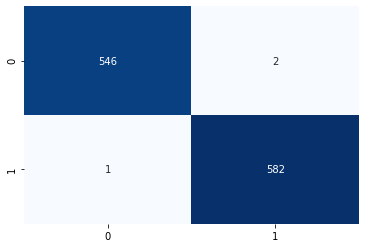

In [ ]:
lr_accuracy=evaluate_model(y_test, pred)

In [ ]:
print(lr_classifier.predict(tfidf.transform([clean_text('The PM Modi-led government is facing heavy uproar over the newly passed agriculture bills in the Parliament. The three farm bills - The Farmers Produce Trade and Commerce (Promotion and Facilitation) Bill, 2020, The Farmers (Empowerment and Protection) Agreement on Price Assurance and Farm Services Bill, 2020, and The Essential Commodities (Amendment) Bill, were passed in both the houses of the Parliament earlier this week, despite strong protest from farmers and opposition parties. Amidst the ongoing widespread demonstrations against the farm bills, an image of a grain silo owned by Adani Agri Logistics Limited is doing rounds on the internet. The picture is being circulated with a claim that Adani Agri has set up a grain silo in Punjab Moga within days of the passing of farm bills. A silo is a giant steel structure used to store grains for a longer duration. One such claim in the Hindi language uploaded on Twitter translates into English as, “The Bill has gone to the President, the rest is in Parliament but preparations for Adani have already begun. Congress and BJP will leave farmers completely ruined. India Today Anti Fake News War Room (AFWA) has found that the claim along with the image is misleading. Adani Agri Logistics Ltd. is more than a decade old, with commissioned silos in seven cities including Moga in Punjab. Similar misleading claims were also shared on Facebook. The archived versions of similar claims can be seen here, here and here. AFWA probe According to the Adani Agri Logistics official website, the company has been functioning in India since 2007 in collaboration with the Food Corporation of India (FCI). The company runs silos at Moga in Punjab and Kaithal in Haryana to store grains. According to the company, the Indian government recognised difficulties faced by farmers in storing food grains using traditional methods. The government along with FCI called for a global tender for the country’s first modern food grain storage facility in the year 2000. This tender was bagged by the Gujarat-based Adani group. Since 2007, farmers have been delivering their produce at Adani’s silos in Moga and Kaithal, and FCI pays for the farmers. The grains are stored in steel silos to preserve their freshness and quality until they are further transported to field depots and later to open markets, according to FCI instructions. We also found Adani Agri Logistics mentioned in multiple news reports which confirmed that the grain silo in question was not a recent construction. According to a Financial Express report published on October 18, 2008, FCI entered a build, own, and operate (BOO) agreement for 20 years with Adani Agri for setting up silos at Moga and Kaithal in 2005. The report further mentions that the company also has five field depots at Chennai, Coimbatore, Bangalore, Navi Mumbai, and Hoogly. We also found reports on Adani Agri Logistics published by BusinessLine and Mint. The Mint report, published in 2015, also mentions the inception of Adani Agri silo in the year 2007. Hence, it is clear that the Adani Agri Logistics is in existence in India since 2007 and is not a recent development.')])))

['REAL']
